# Plot Binodal

This notebook creates plots of the binodal of polyol-CO2 mixtures based on G-ADSA data collected in Prof. Di Maio's lab at the University of Naples June-August 2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import dataproc
import plot

from importlib import reload

# System parameters
# molecular weight of CO2
mw_co2 = 44.01
# conversion of m3 per mL
m3_per_mL = 1E-6
# Save plots?
save_plots = True
# file path to saved data
data_folder = '../g-adsa_results/'
# csv data files
csv_file_list = ['1k2f_30c', '1k3f_30c', '1k2f_60c', '1k3f_30c', '1k3f_60c', '3k2f_31c', '3k2f_60c_lop', '3k2f_60c_hip']

Load data from files into a dictionary of numpy arrays organized by experiment.

In [2]:
d = dataproc.load_proc_data(csv_file_list, data_folder)

Plot binodals. We assume that there is no polyol in the CO2-rich phase.

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


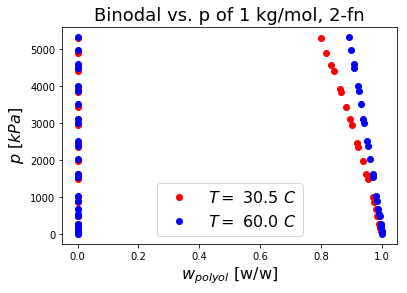

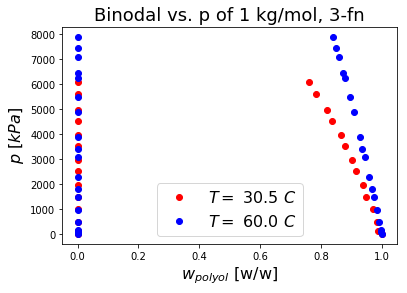

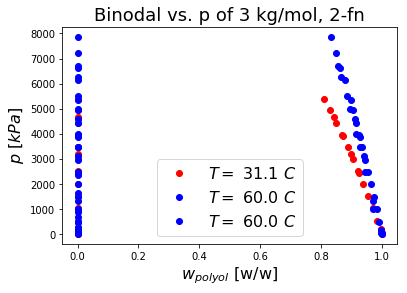

In [18]:
colors = ['r', 'b']
for key in d.keys():
    mw = int(key[0])
    fn = int(key[2])
    ind = mw+fn
    fig = plt.figure(ind)
    ax = fig.add_subplot(111)
    ax.set_title('Binodal vs. p of {0:d} kg/mol, {1:d}-fn'.format(mw, fn), fontsize=18)
    ax.set_xlabel(r'$w_{polyol}$ [w/w]', fontsize=16)
    ax.set_ylabel(r'$p$ [$kPa$]', fontsize=16)
    color=colors[d[key]['T']>35]
    ax.plot(1-d[key]['solub'], d[key]['p'], color=color, marker='o', lw=0,
            label=r'$T =$ {0:.1f} $C$'.format(d[key]['T']))
    ax.plot(np.zeros(len(d[key]['p'])), d[key]['p'], color=color, marker='o', lw=0)
    plt.legend(fontsize=16)
    
if save_plots:
    for key in d.keys():
        mw = int(key[0])
        fn = int(key[2])
        ind = mw+fn
        if d[key]['T'] < 35:
            plt.figure(ind)
            plt.savefig(data_folder + key[:4] + '_binodal.pdf', bbox_inches='tight')